**Author: Nico Grisouard, nicolas.grisouard@physics.utoronto.ca**

*Supporting textbook chapters for week 1: 2, 3 and 4.3*

This is an example of "lecture notes".
As you will quickly find out, this course is by nature a lab course.
Therefore, my "lecture notes" will not often follow the linear progression of regular lecture notes.
This is particularly true for this first lecture, in which I merely want to give you pointers to do the first lab.

# Machine error: round-off error.

Under what circumstances is the following possible?
$$(x+y)+z \neq x + (y + z)$$

Let's try it in Python:

In [1]:
x = 1e20
y = -1e20
z = 1.

In [2]:
(x+y)+z

1.0

In [3]:
x+(y+z)

0.0

What happened?

Round-off error!

# Algorithmic error: instability

Consider this system representing phasor rotation in the complex plane:
$$\dot Z = i\omega Z, \quad\text{given}\quad Z_0 = Z(t=0).$$
Solution is
$Z(t) = Z_0 \exp(i\omega t).$

How can we solve it numerically?

Taylor expansion:
$$\dot Z(t) = \frac{Z(t+\Delta t)-Z(t)}{\Delta t} + H.O.T. = i\omega Z(t).$$

Suggests algorithm: 
* Start with $Z(t=0) = Z_{old}$,
* $Z_{new} = (1+i\omega \Delta t)Z_{old}$,
* repeat.


**Let's code it up and see**

In [4]:
# Unstable solution to dz/dt
from math import pi

Z = complex(1.0, 0.0)  # z0 initial condition
omega = 1.0  # angular frequency 2*pi/period
dt = 2*pi/(200*omega)  # time step is 200 per period
# print initial information
print('t = {0}, Z = {1}, |Z| = {2}'.format(0.0, Z, abs(Z)))

t = 0.0, Z = (1+0j), |Z| = 1.0


In [5]:
for k in range(201):  # update z
    Z *= complex(1.0, dt)  # complex(1.0, dt) is 1+i*dt

# print final information
print('t = {0}'.format(k*dt))
print('Z = {0}'.format(Z))
print('|Z| = {0}'.format(abs(Z)))

t = 6.283185307179587
Z = (1.1037463174652773+0.03239292018556418j)
|Z| = 1.1042215514090952


What happened? What is the problem? Why did it happen?

Next time!

# Typical approach for solving a problem

1. Start with math model, often but not always continuous.
2. **Discretize:** set up discrete arrays of independent variables (e.g., $x$, $t$), dependent variables (e.g. $v(t)$, $a(t)$), and define operators on these variables ($dv/dt$, $ma$...).
3. **Initialize** parameters and variables appropriately.
4. **Evalutize:** run algorithm to operate on these variables.
5. **Analyze:** some extra processing of the raw results, figures...

See example:

In [6]:
# Example to illustrate general procedure for mathematical modeling.
# Given position x(t) of a particle undergoing SHO,
# calculate velocity and acceleration using simple finite difference
import numpy as np  # import numpy
import matplotlib.pyplot as plt  # import figure functions

In [7]:
# 2. Discretize

#Define time grid and dependent variables
t = np.linspace(0, 10, 101)  # time array
N = len(t)  # number of time steps
x = np.empty(N)  # array of positions
v = np.empty(N-1)  # array of velocities
a = np.empty(N-2)  # array of accelerations

In [8]:
# 3. Initialize: define signal on discretized grid
x = 3.0*np.sin(t)

In [9]:
# 2. discretize and 4. evalutize (here, apply algorithm)
# Define velocity using finite differences: v = Delta x/Delta t
for k in range(len(x)-1):
    v[k] = (x[k+1]-x[k])/(t[k+1]-t[k])

# Define acceleration using finite differences: a = Delta v/Delta t
for k in range(len(x)-2):
    a[k] = (v[k+1]-v[k])/(t[k+1]-t[k])

In [10]:
# 5. Analyze
# print results
print("t is ", t)

t is  [  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


In [11]:
print("x is ", x)

x is  [ 0.          0.29950025  0.59600799  0.88656062  1.16825503  1.43827662
  1.69392742  1.93265306  2.15206827  2.34998073  2.52441295  2.67362208
  2.79611726  2.89067456  2.95634919  2.99248496  2.99872081  2.97499443
  2.92154289  2.83890026  2.72789228  2.5896281   2.42548921  2.23711564
  2.02638954  1.79541643  1.54650412  1.28213964  1.00496445  0.71774799
  0.42336002  0.12474199 -0.17512243 -0.47323708 -0.76662331 -1.05234968
 -1.32756133 -1.58950842 -1.83557367 -2.06329848 -2.27040749 -2.45483133
 -2.61472732 -2.74849781 -2.85480622 -2.93259035 -2.98107301 -2.99976977
 -2.98849383 -2.94735784 -2.87677282 -2.77744405 -2.65036397 -2.49680233
 -2.31829346 -2.11662098 -1.89379991 -1.65205663 -1.39380654 -1.12162999
 -0.83824649 -0.54648751 -0.24926821  0.0504417   0.34964761  0.64535996
  0.93462409  1.21454976  1.48234005  1.73531929  1.9709598   2.18690712
  2.38100359  2.55130986  2.69612429  2.81399993  2.90375902  2.9645047
  2.99563004  2.99682403  2.96807474  2.909669

In [12]:
print("a is ", a) 

a is  [-0.29925075 -0.59551148 -0.88582207 -1.16728181 -1.43707845 -1.69251628
 -1.93104305 -2.15027548 -2.34802306 -2.52230998 -2.6713948  -2.79378794
 -2.88826646 -2.95388639 -2.98999205 -2.99622271 -2.9725161  -2.91910908
 -2.8365353  -2.72561979 -2.5874708  -2.42346864 -2.23525199 -2.02470145
 -1.79392075 -1.54521579 -1.28107155 -1.00412726 -0.71715006 -0.42300734
 -0.12463807  0.17497654  0.47284285  0.76598467  1.05147302  1.3264554
  1.58818427  1.83404454  2.06157964  2.26851611  2.45278632  2.6125491
  2.74620816  2.85242801  2.93014734  2.97858961  2.9972708   2.98600424
  2.94490252  2.87437631  2.77513028  2.64815607  2.49472235  2.3163622
  2.11485771  1.89222227  1.65068037  1.39264542  1.12069561  0.83754819
  0.54603226  0.24906055 -0.05039968 -0.34935634 -0.64482234 -0.9338455
 -1.21353797 -1.48110518 -1.73387368 -1.96931788 -2.18508531 -2.37902008
 -2.54918448 -2.69387827 -2.81165571 -2.90134002 -2.9620351  -2.99313451
 -2.9943275  -2.96560217 -2.90724552 -2.81984063 

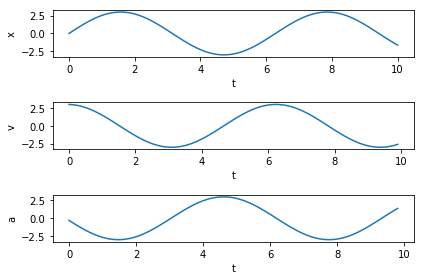

In [14]:
# plot results
plt.figure()

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(3, 1, 2)
plt.plot(t[:N-1], v)
plt.xlabel('t')
plt.ylabel('v')

plt.subplot(3, 1, 3)
plt.plot(t[:N-2], a)
plt.xlabel('t')
plt.ylabel('a')

plt.tight_layout()
# plt.savefig('T01.pdf')  # saves a pdf figure on disk

# Pseudo-code


## General principles

* pseudocode is the planned version of your code, written in plain English ($\neq$ programming language)
* You should write one before starting any code.
* It should describe your algorithm.
* It helps ensure that your planned logic for the algorithm is sound.
* In the previous example: the enunmeration (points 1-5) was the skeleton of one.

* Real text or comments for your real code in the end.
* **Keep a copy of it intact** so you can refer to it when you are coding.
* Coding = your pseudocode $\to$ specific programming language. Be able to take your pseudocode and convert it into any typical programming language.

* Pseudocode: somewhat personal. You do you.
* Concise, logical, step-by-step.
* Start with **brief** overview of what this piece of code will do. 

Examples for sequential stuff:
* Input: `READ`, `OBTAIN`, `GET`
* Initialize: `SET`, `DEFINE`
* Compute: `COMPUTE`, `CALCULATE`, `DETERMINE`
* Add one: `INCREMENT`, `BUMP`
* Output: `PRINT`, `DISPLAY`, `PLOT`, `WRITE`

Examples for conditions and loops:
* `WHILE`, `IF-THEN-ELSE`, `REPEAT-UNTIL`, `CASE`, `FOR`

Should also include calling functions:
* `CALL`

## Pseudo-code, example 1

Convert polar to Cartesian coordinates from keyboard input:

$r$, $\theta$ ($^\circ$) $\to$ $x$, $y$.

Let's try:

1. From keyboard, read radius $r$ and save.
2. From keyboard, read angle $\theta$ in degrees and save.
3. Do the conversion from degrees to angles ($\theta_r = \pi \theta/180$).
4. Compute $(x, y) = r(\cos\theta_r, \sin\theta_r)$.
5. Print result to screen.

Alternative: write the pseudo-code code comments.

In [ ]:
#1. From keyboard, read radius $r$ and save.
#2. From keyboard, read angle $\theta$ in degrees and save.
#3. Do the conversion from degrees to angles ($\theta_r = \pi \theta/180$).
#4. Compute $(x, y) = r(\cos\theta_r, \sin\theta_r)$.
#5. Print result to screen.

In [15]:
# Re-import numpy, in case I am executing cells in random order
import numpy as np

In [16]:
# 1. From keyboard, read the radius and save.
r = float(input("Enter r:"))

Enter r:2


In [17]:
# 2. From keyboard, read de angle $\theta$ in degrees and save.
theta_deg = float(input("Enter theta in degrees:"))

Enter theta in degrees:45


In [18]:
# 3. Do the conversion from degrees to angles ($\theta_r = \pi \theta/180$).
theta_r = np.pi*theta_deg/180.

In [19]:
# 4. Compute $(x, y) = r(\cos\theta_r, \sin\theta_r)$.
x = r * np.cos(theta_r)
y = r * np.sin(theta_r)

In [20]:
# 5. Print result to screen.
print("x = ", x, "y = ", y)

x =  1.41421356237 y =  1.41421356237


## Pseudo-code, example 2

* Number of radioactive atoms of uranium $N$ as a function of time given initial $N_0$ and
$$\frac{dN}{dt} = -\frac{N}{\tau}.$$
($\tau = $ decay constant)
* Use Euler method for integration.

In [ ]:
# Pseudocode:

# 1. Define decay constant tau, initial N0, and end time 5*tau
# 2. Initialize time and time array with 101 values
# 3. Compute dt the time step because we'll need it
# 4. Initialize a number array with same number of particles
# 5. Increment the N array with Euler: N[i+1] = N[i] - dt*N[i]/tau
# 6. Plot N vs. t

In [ ]:
# Code that computes the number of radioactive atoms of uranium N
# as fct of time, given tau and N0 and using Euler method.
# Author: Nicolas Grisouard

# Re-import, in case I am executing cells in random order
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# I skipped this cell in class: it is a conversion of the 
# half-life of U238 (which is easily found on Wikipedia)
# and the decay rate (which for some reason is not)
print("{0:1.3e}".format(4.468e9/np.log(2.)))

In [ ]:
# 1. Define decay constant tau, initial N0, and end time 5*tau
tau = 6.446e9  # [s] tau for U238
N0 = 1e9  # [1] why not
t_end = 5*tau  # [s] the end of the simulation time

In [ ]:
# 2. Initialize time array with 101 values
t_array = np.linspace(0, t_end, 101)
# 3. Compute dt the time step because we'll need it
dt = t_array[1] - t_array[0]
# 4. Initialize a number array with same number of elements
N_array = 0*t
N_array[0] = N0

In [ ]:
# 5. Increment the N array with Euler: N[i+1] = N[i] - dt*N[i]/tau
for i in range(len(t_array)-1):  # I end at the second-to-last value
    N_array[i+1] = (1. - dt/tau)*N_array[i]

In [ ]:
# 6. Plot N vs. t
plt.figure()
plt.plot(t_array, N_array)
plt.xlabel('t (a)')
plt.ylabel('N')
plt.grid()